In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("MNIST.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#data processing into 2D arrays
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

#validation data
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255 #normalize to range [0,1]

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255

In [4]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z) #deals with vanishing gradient

def ReLU_deriv(Z):
    return Z > 0 #used in backpropagation

def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z)) #turns values into probability distribution

def forward_propagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot_transform(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1 #set the value corresponding with the label to 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def back_propagation(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot_transform(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [5]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_propagation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [6]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration:  0
[6 6 6 ... 6 6 4] [5 7 3 ... 1 4 5]
0.08465853658536586
Iteration:  10
[7 7 8 ... 8 6 4] [5 7 3 ... 1 4 5]
0.18465853658536585
Iteration:  20
[7 7 8 ... 8 6 8] [5 7 3 ... 1 4 5]
0.2849512195121951
Iteration:  30
[7 7 8 ... 8 6 8] [5 7 3 ... 1 4 5]
0.37165853658536585
Iteration:  40
[7 7 8 ... 8 6 8] [5 7 3 ... 1 4 5]
0.44858536585365855
Iteration:  50
[7 7 8 ... 8 6 8] [5 7 3 ... 1 4 5]
0.5112682926829268
Iteration:  60
[7 7 8 ... 8 6 8] [5 7 3 ... 1 4 5]
0.5633658536585365
Iteration:  70
[1 7 8 ... 5 6 8] [5 7 3 ... 1 4 5]
0.6051219512195122
Iteration:  80
[1 7 8 ... 1 6 8] [5 7 3 ... 1 4 5]
0.6387317073170732
Iteration:  90
[1 7 8 ... 1 6 8] [5 7 3 ... 1 4 5]
0.6631463414634147
Iteration:  100
[1 7 8 ... 1 6 8] [5 7 3 ... 1 4 5]
0.6841463414634147
Iteration:  110
[1 7 8 ... 1 6 3] [5 7 3 ... 1 4 5]
0.7016585365853658
Iteration:  120
[3 7 8 ... 1 6 3] [5 7 3 ... 1 4 5]
0.7155365853658536
Iteration:  130
[3 7 8 ... 1 6 3] [5 7 3 ... 1 4 5]
0.728390243902439
Iteration:  14

In [7]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  5


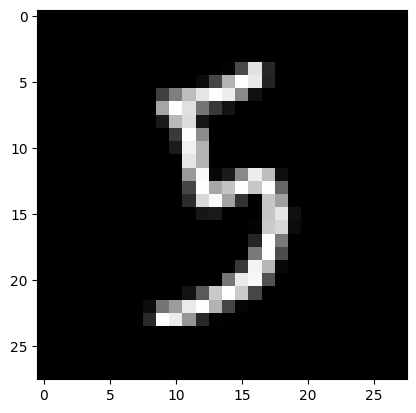

Prediction:  [7]
Label:  7


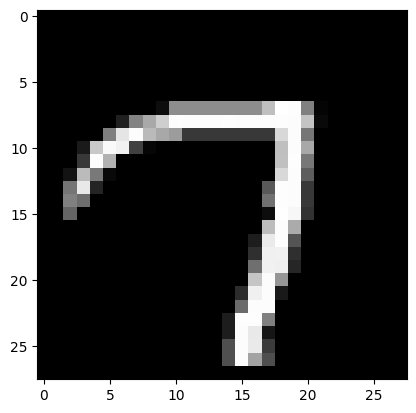

Prediction:  [8]
Label:  3


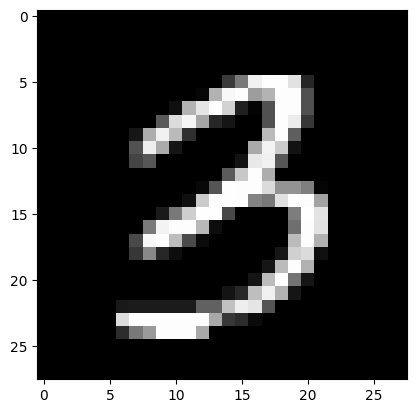

Prediction:  [2]
Label:  2


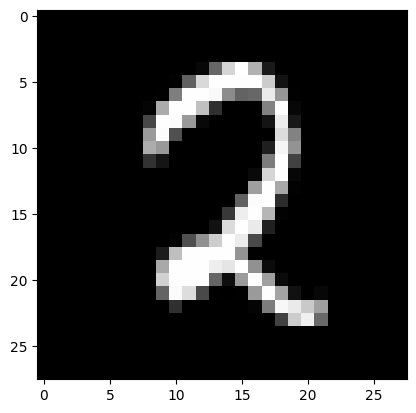

In [8]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [9]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[2 3 8 8 0 4 9 1 0 3 7 9 4 7 0 0 2 9 8 3 6 9 4 7 0 1 4 6 1 7 0 1 1 9 7 0 3
 1 0 3 2 0 0 3 8 5 0 2 4 0 7 3 3 5 1 2 3 3 1 3 6 8 3 2 5 4 1 6 8 3 6 1 8 8
 3 0 4 2 0 3 9 1 4 5 0 4 5 2 7 8 4 9 5 9 2 3 2 6 6 4 3 4 8 6 5 1 4 4 1 2 1
 3 1 2 7 0 3 8 0 1 5 1 2 9 2 7 3 6 9 3 3 7 6 2 1 3 7 2 6 2 0 7 3 5 6 9 3 8
 6 0 4 5 7 8 4 2 2 7 7 8 2 8 1 4 7 5 2 7 0 1 7 8 3 0 0 0 1 3 8 1 4 2 7 9 5
 1 8 3 4 5 8 8 7 5 9 0 4 7 1 4 9 9 0 5 0 2 3 8 3 9 7 1 4 2 4 2 1 6 3 5 0 0
 1 4 1 5 8 4 7 7 0 2 2 3 1 9 2 2 9 1 6 1 8 0 5 3 9 7 9 5 7 1 8 2 4 3 1 3 3
 6 0 0 9 3 8 6 1 4 7 5 8 5 5 2 1 9 7 1 3 2 7 6 6 7 1 3 6 3 1 4 5 1 6 8 4 0
 6 1 9 3 3 6 7 6 4 0 5 6 2 7 5 4 6 6 9 6 1 9 2 9 7 6 3 0 0 4 1 8 6 1 1 4 7
 0 3 2 5 8 0 5 8 9 8 8 0 7 3 0 7 0 0 2 6 4 3 6 9 4 1 6 0 5 7 1 4 8 5 4 2 0
 4 5 6 0 1 1 7 9 8 3 6 7 7 2 2 1 3 1 9 1 9 0 1 0 8 9 6 6 4 9 9 9 2 7 7 2 2
 3 1 0 6 3 0 7 7 9 6 1 3 9 0 8 1 9 6 3 7 3 1 4 6 9 6 4 6 2 1 6 3 9 9 0 7 9
 4 4 9 0 0 6 1 0 8 3 5 3 1 3 0 2 5 0 8 3 2 0 9 7 1 6 0 9 4 8 0 3 3 9 5 7 8
 0 8 7 5 0 7 5 8 4 0 1 6 

0.851